<a href="https://colab.research.google.com/github/kgtantry/DeepLearning/blob/main/PreTrained_Ensemble_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2, os

In [2]:
resnet = tf.keras.applications.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [3]:
resnet.input_shape

(None, 224, 224, 3)

In [4]:
resnet.output_shape

(None, 1000)

In [7]:
! wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg

--2023-04-08 16:24:10--  https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229955 (225K) [image/jpeg]
Saving to: ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg’

dog-puppy-on-garden 100%[===================>] 224.57K  --.-KB/s    in 0.03s   

2023-04-08 16:24:10 (7.39 MB/s) - ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg’ saved [229955/229955]



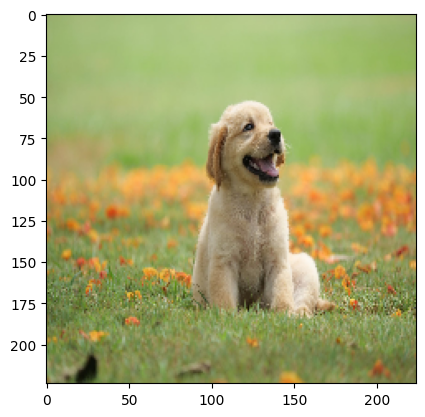

In [8]:
image = cv2.imread("dog-puppy-on-garden-royalty-free-image-1586966191.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224,224))
plt.imshow(image)

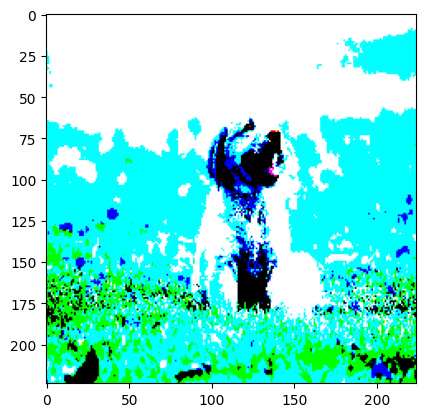

In [9]:
image = tf.keras.applications.resnet50.preprocess_input(image)
plt.imshow(image)

In [10]:
image = np.expand_dims(image, axis=0)

In [11]:
image.shape

(1, 224, 224, 3)

In [12]:
result = resnet.predict(image) # 1000 prob

1/1 [==============================] - 2s 2s/step


In [13]:
np.argmax(result) # 267 index has the highest prob, what class is this?

267

In [14]:
tf.keras.applications.resnet50.decode_predictions(result)

35363/35363 [==============================] - 0s 0us/step


[[('n02113799', 'standard_poodle', 0.72619057),
  ('n02099601', 'golden_retriever', 0.1898389),
  ('n02099712', 'Labrador_retriever', 0.054810483),
  ('n02113712', 'miniature_poodle', 0.0117988875),
  ('n02102318', 'cocker_spaniel', 0.0043434915)]]

In [15]:
#Inception, Resnet, VGG, EfficientNet
# list of all Pre Trained Models - https://keras.io/api/applications/

In [16]:
resnet_no_top_layer = tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3))

94765736/94765736 [==============================] - 1s 0us/step


In [17]:
resnet_no_top_layer.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

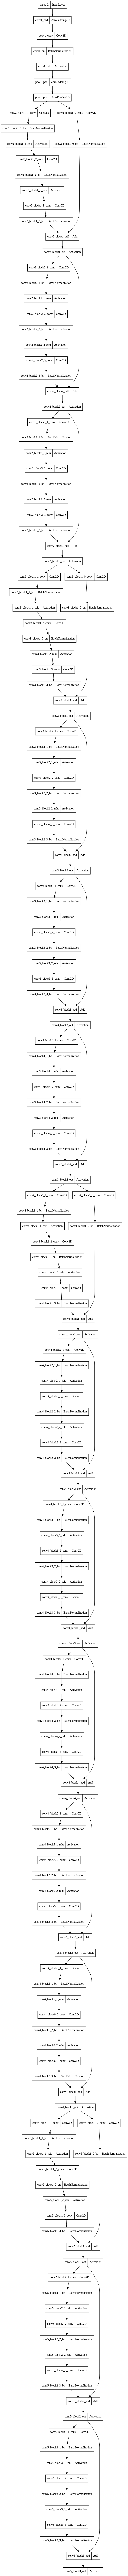

In [18]:
tf.keras.utils.plot_model(resnet_no_top_layer)

In [19]:
vgg_no_top_layer = tf.keras.applications.VGG16(include_top=False, input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [20]:
vgg_no_top_layer.output_shape

(None, 7, 7, 512)

In [21]:
import kaggle  # for the very first time this will fail

OSError: ignored

In [22]:
#logload kaggle.json
#move to /root/.kaggle

In [23]:
! mv kaggle.json /root/.kaggle


In [24]:
import kaggle

In [26]:
! kaggle competitions download -c dog-breed-identification

 98% 675M/691M [00:03<00:00, 214MB/s]
100% 691M/691M [00:03<00:00, 197MB/s]


In [27]:
! unzip -q dog-breed-identification.zip

In [28]:
# All images are in train folder
# and we also have a lables.csv imageName --> Label

In [29]:
label = pd.read_csv("labels.csv")

In [30]:
label.sample(5)

,id,breed
7076,b1a81d15f7628ab8d88dbe0ed24924fa,bedlington_terrier
2508,3e76131101838e9ea1f12dc2eba4c6f1,leonberg
1357,215fb2b75397fe9010c35fe84f2a07b2,saint_bernard
2705,42bd3e15f7b7966c0890cac3288e980f,west_highland_white_terrier
6146,9adbe43816a43b4e4510c7ebdf88d1fc,lakeland_terrier


In [34]:
label['filename'] = label['id'] + ".jpg"
label.sample(5)

,id,breed,filename
6979,aef57a16eab44e62bc3a68cc9b2e7ec4,bloodhound,aef57a16eab44e62bc3a68cc9b2e7ec4.jpg
4263,6a4e72cc29e5256ee7e631191c6ab35f,lakeland_terrier,6a4e72cc29e5256ee7e631191c6ab35f.jpg
8773,dbe9a2868d227a12197fb6c44b93d85a,norfolk_terrier,dbe9a2868d227a12197fb6c44b93d85a.jpg
8147,cbb942c46449834575961dcf0d2c27f0,japanese_spaniel,cbb942c46449834575961dcf0d2c27f0.jpg
8125,cb2355a42af96267976f7f0ecf0f0de7,basset,cb2355a42af96267976f7f0ecf0f0de7.jpg


In [31]:
batch_size = 64

In [32]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1, rotation_range=0.3, horizontal_flip = True)

In [37]:
train_idg = idg.flow_from_dataframe(label, directory = 'train/', x_col='filename',y_col='breed', target_size = (224,224), batch_size = batch_size, subset='training')

Found 9200 validated image filenames belonging to 120 classes.


In [39]:
val_idg = idg.flow_from_dataframe(label, directory = 'train/', x_col='filename', y_col = 'breed', target_size = (224,224), batch_size = batch_size, subset = 'validation')

Found 1022 validated image filenames belonging to 120 classes.


In [41]:
# Input Layer (1)

input = tf.keras.layers.Input((224,224,3), name ='InputLayer')


In [46]:
#VGG
#PreProcessing Layer(2)
vgg_pre_process = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name= "VGGPreProcess")(input)

#Download the model # This is not a layer just a download of Model
vgg_model = tf.keras.applications.VGG16(include_top=False, input_shape = (224,224,3))
vgg_model.trainable = False # We do not intend to change the VGG weights

#Vgg layer(3)
vgg = vgg_model (vgg_pre_process)

#Global Avg Pooling (4)
vgg_avg = tf.keras.layers.GlobalAveragePooling2D(name='VGGGlobalAvgPool')(vgg)

# New Section